In [4]:
import sys
import gym
import numpy as np
from gym import wrappers, logger
import matplotlib.pyplot as plt
from tempfile import mkdtemp

In [5]:
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
def random_policy(theta, ob):
    return 0 if np.inner(theta, ob) < 0 else 1

In [7]:
def rollout(env, theta):
    ob = env.reset()
    R_total = 0
    for _ in range(T):
        action = random_policy(theta, ob)
        ob, R, done, _ = env.step(action)
        R_total += R
        if done:
            break
    return R_total

In [8]:
NUM_EPISODES = 10000
T = 500
env = gym.make('CartPole-v0')
env._max_episode_steps = T
env = wrappers.Monitor(env, directory=mkdtemp(), force=True)
logger.set_level(logger.INFO)

In [9]:
theta_max, R_max = None, 0
R_log = []
for _ in range(NUM_EPISODES):
    theta = np.random.rand(4) * 2 - 1
    R = rollout(env, theta)
    R_log.append(R)
    if R > R_max:
        R_max = R
        theta_max = theta
        if R == T:
            break
env.close()

INFO: Starting new video recorder writing to /tmp/tmp_4qxi47w/openaigym.video.0.20385.video000000.mp4
INFO: Starting new video recorder writing to /tmp/tmp_4qxi47w/openaigym.video.0.20385.video000001.mp4
INFO: Starting new video recorder writing to /tmp/tmp_4qxi47w/openaigym.video.0.20385.video000008.mp4
INFO: Starting new video recorder writing to /tmp/tmp_4qxi47w/openaigym.video.0.20385.video000027.mp4


In [10]:
theta_max, R_max

(array([-0.02718035,  0.2997322 ,  0.48582733,  0.45991981]), 500.0)

Text(0, 0.5, 'R')

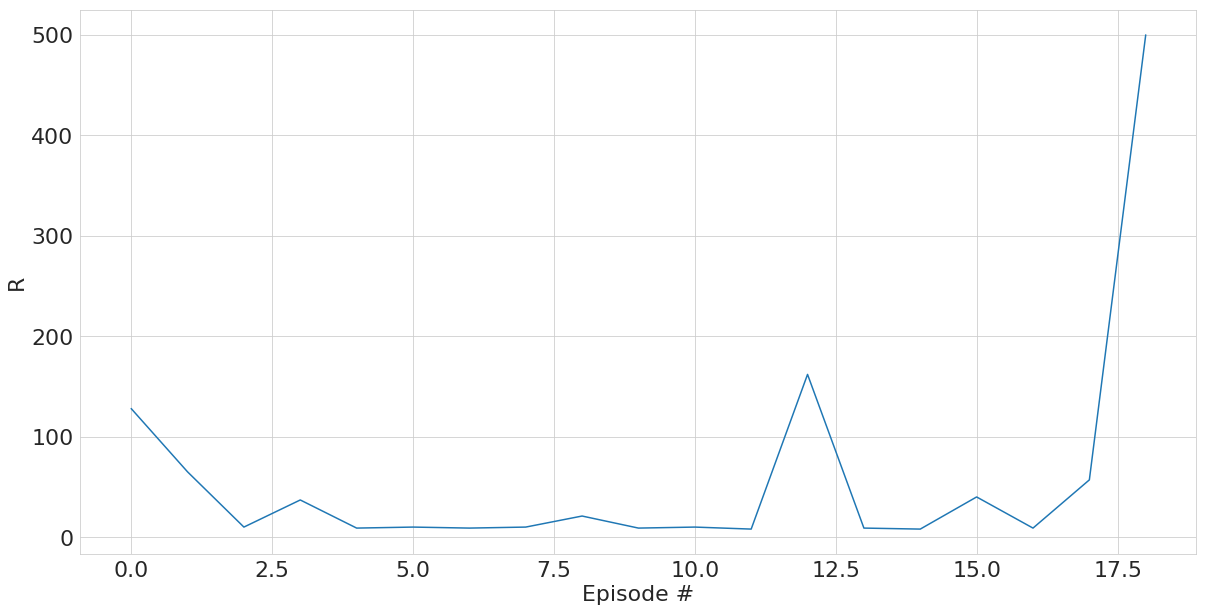

In [121]:
plt.rcParams.update({'font.size':22})
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(R_log)), R_log)
ax.set_xlabel('Episode #')
ax.set_ylabel('R')